# Lab 2

## Margaret Haswell

### Part 1: The Ideal Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

In [2]:
# Part 1.1

# defining constants

G = 6.6743e-11 # m^3/kg/s^2
M_E = 5.972e24 # kg
R_E = 6.3781e6 # m

v0 = 0 # m/s
a = -G*M_E/R_E**2 # m/s^2
d = -4e3 # m

# find time

tt = np.sqrt(2/a*d)
print(f"It would take {tt} seconds for the test mass to reach the bottom of the shaft if there is no drag force.")

It would take 28.57416552900485 seconds for the test mass to reach the bottom of the shaft if there is no drag force.


##### Part 1.2

System of equations:

$v = \frac{dy}{dt}$

$\frac{dv}{dt} = -g - \alpha v^{\gamma}$

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.003e-02 ...  2.997e+01  3.000e+01]
        y: [[ 0.000e+00 -4.418e-03 ... -4.400e+03 -4.409e+03]
            [ 0.000e+00 -2.942e-01 ... -2.936e+02 -2.939e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


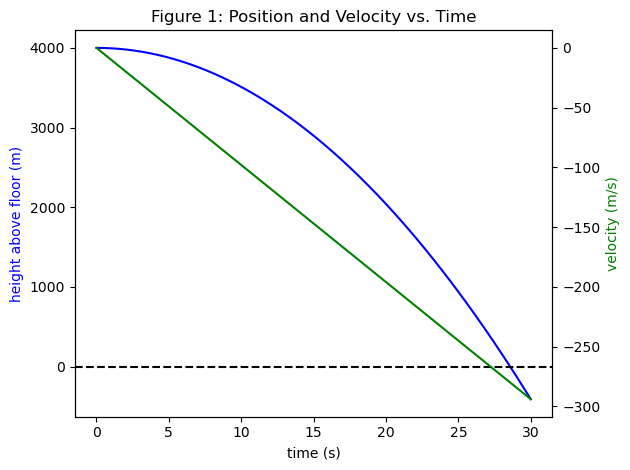

In [3]:
# Part 1.3

g0 = G*M_E/R_E**2 # m/s^2
d = 4e3 # m

def derivative(t,s): # derivative function for constant gravity and no drag
    y = s[0]
    v = s[1]

    dydt = v
    dvdt = -g0

    return dydt, dvdt

t0, tf = 0, 30 # s
n = 1000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

soln = solve_ivp(fun = derivative, t_span=(t0,tf), y0 = init_cond, t_eval = t) # solve equation
print(soln)

# get results and plot

t = soln.t 
y = soln.y[0] + 4000 # returns height above floor of mine
v = soln.y[1]

fig1, ax1 = plt.subplots(1,1)
ax1a = ax1.twinx()
ax1.plot(t, y, color = "blue", label = "position")
ax1a.plot(t, v, color = "green", label = "velocity")
ax1.axhline(0, color = 'black', linestyle = "--")
ax1.set_xlabel("time (s)")
ax1.set_ylabel("height above floor (m)", color = "blue")
ax1a.set_ylabel("velocity (m/s)", color = "green")
ax1.set_title("Figure 1: Position and Velocity vs. Time")
fig1.tight_layout()
fig1.savefig("Figure1.png")

In [4]:
# 1.4

def bottom(t,s): # function that will return zero when the mass reaches the bottom
    return s[0] + 4000

soln = solve_ivp(fun = derivative, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = bottom) # include events function
event = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"Using the solve_ivp events detection, the mass hits the bottom of the shaft at {event[0]} seconds.")

Using the solve_ivp events detection, the mass hits the bottom of the shaft at 28.574165529004848 seconds.


Question 1.4:

The analytic and numerical solution for uniform gravity yield identical times up to the 14th decimal place.

### Part 2: Including Drag and a Variable g

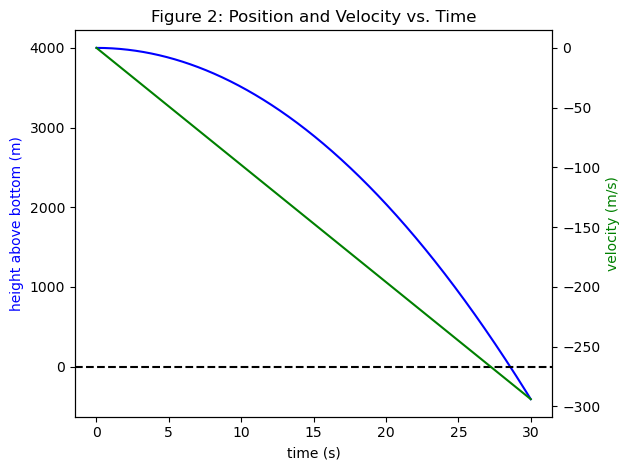

In [5]:
# 2.1

def derivative2(t,s): # derivative function for non-constant gravity and no drag
    y = s[0]
    v = s[1]
    r = R_E + s[0]

    dydt = v
    dvdt = -g0*(r/R_E)

    return dydt, dvdt


t0, tf = 0, 30 # s
n = 1000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

soln = solve_ivp(fun = derivative2, t_span=(t0,tf), y0 = init_cond, t_eval = t) # solve equations

t = soln.t 
y = soln.y[0] + 4000 # gets height above the bottom of the mine
v = soln.y[1]

fig2, ax2 = plt.subplots(1,1)
ax2a = ax2.twinx()
ax2.plot(t, y, color = "blue", label = "position")
ax2a.plot(t, v, color = "green", label = "velocity")
ax2.axhline(0, color = 'black', linestyle = "--")
ax2.set_xlabel("time (s)")
ax2.set_ylabel("height above bottom (m)", color = "blue")
ax2a.set_ylabel("velocity (m/s)", color = "green")
ax2.set_title("Figure 2: Position and Velocity vs. Time")
fig2.tight_layout()
fig2.savefig("Figure2.png")

In [6]:
# 2.2

def bottom(t,s): # function that returns 0 when the mass reaches the bottom
    return s[0] + 4000

soln = solve_ivp(fun = derivative2, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = bottom)
event = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"Using the solve_ivp events detection, the mass hits the bottom of the shaft at {event[0]} seconds if we consider \
non-constant g.")


Using the solve_ivp events detection, the mass hits the bottom of the shaft at 28.575659086738423 seconds if we consider non-constant g.


Question 2.2: It will take about one one thousandth of a second longer for the mass to reach the bottom of the shaft if we assume that g is not constant. According to the equation, g will decrease as you move towards the center of the Earth. This is because as it falls, there is less mass below it pulling it down, which causes a smaller acceleration due to gravity. Therefore, we expect it will take longer to reach the bottom.

Our value for alpha, given our expected terminal velocity of 50 m/s, should be 0.003919249086741722.


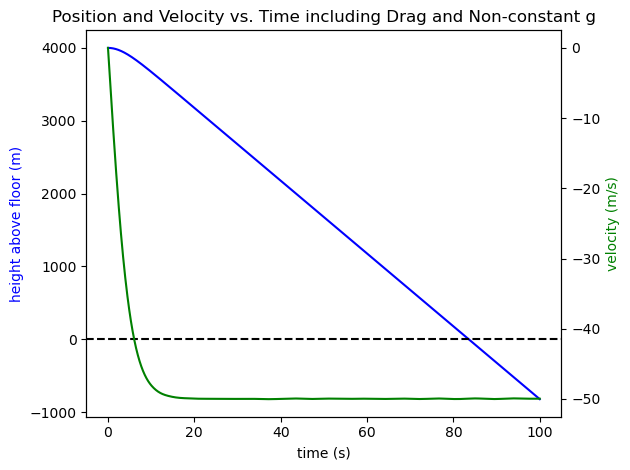

In [7]:
# 2.3

v_terminal = 50 # m/s
gamma = 2
alpha = g0/(v_terminal**gamma) # solving for alpha based on our expected terminal velocity

print(f"Our value for alpha, given our expected terminal velocity of 50 m/s, should be {alpha}.")

def derivative3(t,s): # derivative function for non-constant gravity and drag
    y = s[0]
    v = s[1]
    r = R_E + y

    dydt = v
    dvdt = -g0*(r/R_E) + alpha*np.absolute(v)**gamma

    return dydt, dvdt


t0, tf = 0, 100 # s
n = 1000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

soln = solve_ivp(fun = derivative3, t_span=(t0,tf), y0 = init_cond, t_eval = t) # solve equation

# plot results

t = soln.t 
y = soln.y[0] + 4000 # returns height above the bottom of the mine
v = soln.y[1]

fig3, ax3 = plt.subplots(1,1)
ax3a = ax3.twinx()
ax3.plot(t, y, color = "blue", label = "position")
ax3a.plot(t, v, color = "green", label = "velocity")
ax3.axhline(0, color = 'black', linestyle = "--")
ax3.set_xlabel("time (s)")
ax3.set_ylabel("height above floor (m)", color = "blue")
ax3a.set_ylabel("velocity (m/s)", color = "green")
ax3.set_title("Position and Velocity vs. Time including Drag and Non-constant g");
fig3.tight_layout()

To find the value of $\alpha$, we plugged in the terminal velocity 50 m/s for $\frac{dy}{dt}$ into the differential equation. When the mass reaches terminal velocity, acceleration will equal 0, so we can plug in zero for $\frac{d^2y}{dt^2}$. We plugged in 2 for $\gamma$, and then solved for $\alpha$.

In [8]:
def bottom(t,s):
    return s[0] + 4000

soln = solve_ivp(fun = derivative3, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = bottom)
event = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"Using the solve_ivp events detection, the mass hits the bottom of the shaft at {event[0]} seconds if we consider \
non-constant gravity and drag.")


Using the solve_ivp events detection, the mass hits the bottom of the shaft at 83.54624949346241 seconds if we consider non-constant gravity and drag.


Question 2.3: 

If we consider drag, the time it takes the mass to hit the bottom of the shaft increases almost by a factor of 3.

### Part 3:

Differential equations of motion including the Coriolis force

$\frac{dy}{dt} = v$

$\frac{dv}{dt} = -g_0{\frac{r}{R_{Earth}}} + \alpha|v|^{\gamma} + -2(\vec{\Omega} \times \vec{v})$



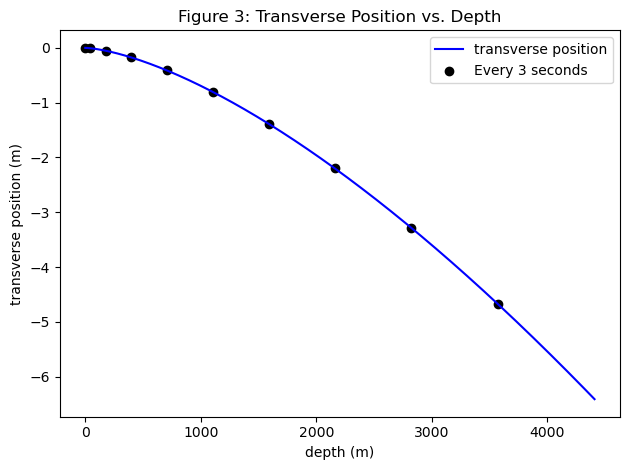

In [9]:
# 3.1, 3.2

omega = 7.272E-5 # rad/s
m = 1 # kg

def derivative4(t,s): # derivative function for non-constant gravity, no drag, and Coriolis force
    x = s[0] # transverse position
    y = s[1] # depth position
    v_x = s[2] # transverse velocity
    v_y = s[3] # depth velocity
    r = R_E + y

    dxdt = v_x # transverse velocity
    dydt = v_y # depth velocity
    dvdt_x = 2*omega*v_y # transverse acceleration
    dvdt_y = -g0*(r/R_E) - 2*omega*v_x # depth acceleration

    return [dxdt, dydt, dvdt_x, dvdt_y]

t0, tf = 0, 30 # s
n = 1000
t = np.linspace(t0, tf, n)

init_cond = [0, 0, 0, 0] # assumes the mass starts at x = 0, y = 0, vx = 0 and vy = 0

soln = solve_ivp(fun = derivative4, t_span=(t0,tf), y0 = init_cond, t_eval = t)

# plot solution

t = soln.t 
x = soln.y[0]
y = soln.y[1]
v_x = soln.y[2]
v_y = soln.y[3]

fig4, ax4 = plt.subplots(1,1)
ax4.plot(-y, x, color = "blue", label = "transverse position")
ax4.set_xlabel("depth (m)")
ax4.set_ylabel("transverse position (m)")
ax4.set_title("Figure 3: Transverse Position vs. Depth")

# find and plot points every three seconds

t_points = np.arange(0, 30, 3)
soln2 = solve_ivp(fun = derivative4, t_span=(t0,tf), y0 = init_cond, t_eval = t_points)
x_points = soln2.y[0]
y_points = soln2.y[1]
ax4.scatter(-y_points, x_points, color = "black", label = "Every 3 seconds")
ax4.legend()
fig4.tight_layout()
fig4.savefig("Figure3.png")

In [10]:
# 3.3

def side(t,s): # function which returns 0 when the mass hits the wall
    return s[0] + 2.5

def bottom(t,s): # function which returns 0 when the mass hits the bottom
    return s[1] + 4000

init_cond = [0, 0, 0, 0]
soln = solve_ivp(fun = derivative4, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = [side, bottom])

t_side = soln.t_events[0][0]
y_side = soln.y_events[0][0][1]
y_side_abs = np.abs(y_side)
t_bottom = soln.t_events[1][0]

print(f"If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection,\
 the mass hits the side of the shaft at {t_side} seconds, at a depth of {y_side_abs} meters.")
print()
print(f"If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection,\
 the mass hits the bottom of the shaft at {t_bottom} seconds.")

If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection, the mass hits the side of the shaft at 21.91595130285165 seconds, at a depth of 2352.9162033330294 meters.

If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection, the mass hits the bottom of the shaft at 28.575679655117938 seconds.


Since the time it takes for the mass to hit the side is smaller than the time it would take for it to hit the bottom, and it hits at a depth of less than 4000 meters, we can conclude that the mass would bump into the wall first.

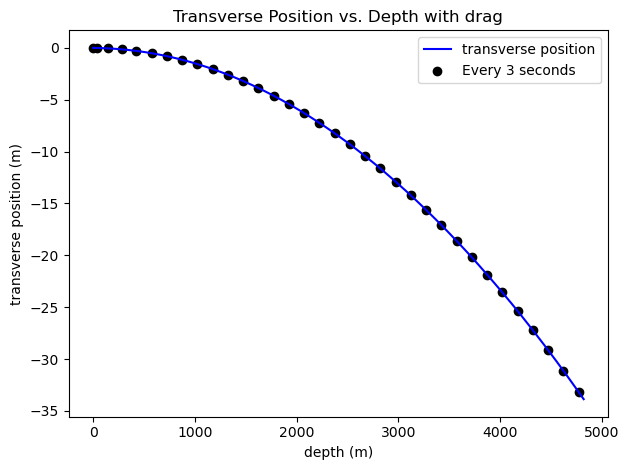

In [11]:
# 3.4

def derivative5(t,s): # derivative function for non-constant gravity, drag, and Coriolis force 
    x = s[0] # transverse position
    y = s[1] # depth position
    v_x = s[2] # transverse velocity
    v_y = s[3] # depth velocity
    r = R_E + y

    dxdt = v_x # transverse velocity
    dydt = v_y # depth velocity
    dvdt_x = 2*omega*v_y # transverse acceleration
    dvdt_y = -g0*(r/R_E) + alpha*np.absolute(v_y)**gamma - 2*omega*v_x # depth acceleration

    return [dxdt, dydt, dvdt_x, dvdt_y]

t0, tf = 0, 100 # s
n = 1000
t = np.linspace(t0, tf, n)

init_cond = [0, 0, 0, 0] # assumes the mass starts at x = 0, y = 0, vx = 0 and vy = 0

soln = solve_ivp(fun = derivative5, t_span=(t0,tf), y0 = init_cond, t_eval = t)

# plot solution

t = soln.t 
x = soln.y[0]
y = soln.y[1]
v_x = soln.y[2]
v_y = soln.y[3]

fig5, ax5 = plt.subplots(1,1)
ax5.plot(-y, x,  color = "blue", label = "transverse position")
ax5.set_xlabel("depth (m)")
ax5.set_ylabel("transverse position (m)")
ax5.set_title("Transverse Position vs. Depth with drag")

# find and plot points every three seconds

t_points = np.arange(0, 100, 3)
soln2 = solve_ivp(fun = derivative5, t_span=(t0,tf), y0 = init_cond, t_eval = t_points)
x_points = soln2.y[0]
y_points = soln2.y[1]
ax5.scatter(-y_points, x_points, color = "black", label = "Every 3 seconds")
ax5.legend()
fig5.tight_layout()

In [12]:
def side(t,s):
    return s[0] + 2.5

def bottom(t,s):
    return s[1] + 4000

init_cond = [0, 0, 0, 0]
soln = solve_ivp(fun = derivative5, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = [side, bottom])

t_side = soln.t_events[0][0]
y_side = soln.y_events[0][0][1]
t_bottom = soln.t_events[1][0]

print(f"If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection,\
 the mass hits the side of the shaft at {t_side} seconds, and at a height of {y_side} meters.")
print()
print(f"If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection,\
 the mass hits the bottom of the shaft at {t_bottom} seconds.")

If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection, the mass hits the side of the shaft at 29.58689482139542 seconds, and at a height of -1302.5178678558943 meters.

If we ignore drag, and just include the force of gravity and the coriolis force, using the solve_ivp events detection, the mass hits the bottom of the shaft at 83.54829956386843 seconds.


If we consider drag, the mass hits the side about eight seconds later then it did with no drag. However, it hits the wall about 1000 meters higher than when there is no drag, and it hits the side in about one third of the time it would take to hit the bottom.

### Part 4: An infinitely deep mine

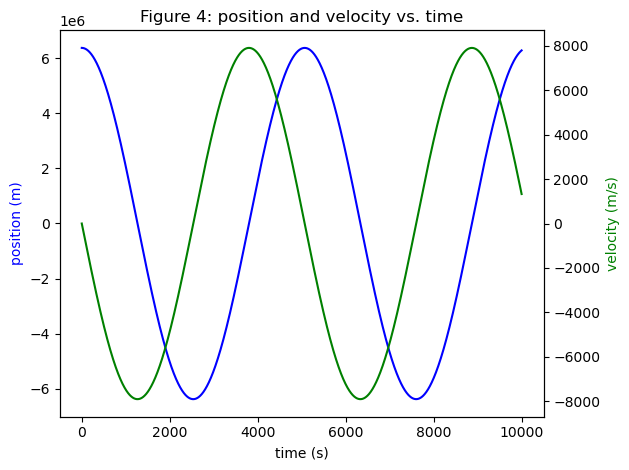

In [13]:
# Part 4.1

def derivative6(t,s): # derivative function for non-constant gravity, no drag, no Coriolis effect
    y = s[0]
    v = s[1]
    r = R_E + s[0]

    dydt = v
    dvdt = -g0*(r/R_E)

    return dydt, dvdt


t0, tf = 0, 10000 # s
n = 100000
t = np.linspace(t0, tf, n)

init_cond = [0, 0] # assumes mass starts at x = 0 and y = 0

soln = solve_ivp(fun = derivative6, t_span=(t0,tf), y0 = init_cond, t_eval = t)

# plot the solution

t = soln.t 
y = soln.y[0] + R_E # gets position of the mass where the center of the Earth = 0
v = soln.y[1]

fig6, ax6 = plt.subplots(1,1)
ax6a = ax6.twinx()
ax6.plot(t, y, color = "blue", label = "position")
ax6a.plot(t, v, color = "green", label = "velocity")
ax6.set_xlabel("time (s)")
ax6.set_ylabel("position (m)", color = "blue")
ax6a.set_ylabel("velocity (m/s)", color = "green")
ax6.set_title("Figure 4: position and velocity vs. time");
fig6.tight_layout()
fig6.savefig("Figure4.png")

The graph shows that the position and velocity oscillate sinusoidally as a function of time, and they are 90 degrees out of phase with each other. This indicates the mass will oscillate continuously up and down the mine.

In [14]:
# Part 4.2

def other_side(t,s): # function returns zero when the mass reaches the opposite side of the Earth
    return s[0] + 2*(0.999*R_E)

soln = solve_ivp(fun = derivative6, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = other_side, rtol = 1e-10, atol = 1e-12)

t_other_side = soln.t_events[0][0]

print(f"The mass reaches the other side of the Earth in {t_other_side} seconds.")

The mass reaches the other side of the Earth in 2483.64960047659 seconds.


In [15]:
def center(t,s): # function returns zero when the mass reaches the center of the Earth.
    return s[0] + R_E

soln2 = solve_ivp(fun = derivative6, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = center)
t_center = soln2.t_events[0][0]
y_center = soln2.y_events[0][0][1]
y_center_abs = np.abs(y_center)
print(f"The mass reaches the center of the Earth in {t_center} seconds.")
print(f"The mass is moving at {y_center_abs} m/s when it reaches the center of the Earth.")

The mass reaches the center of the Earth in 1267.2282288730855 seconds.
The mass is moving at 7905.676404484265 m/s when it reaches the center of the Earth.


In [16]:
v = np.sqrt(G*M_E/R_E)
T = (2*np.pi*R_E)/v

print(f"The orbital period is {T} seconds, which is two times the time it takes the mass to fall from one side of the\
 Earth to the other.")

The orbital period is 5069.371199675785 seconds, which is two times the time it takes the mass to fall from one side of the Earth to the other.


### Part 5: A non-uniform Earth

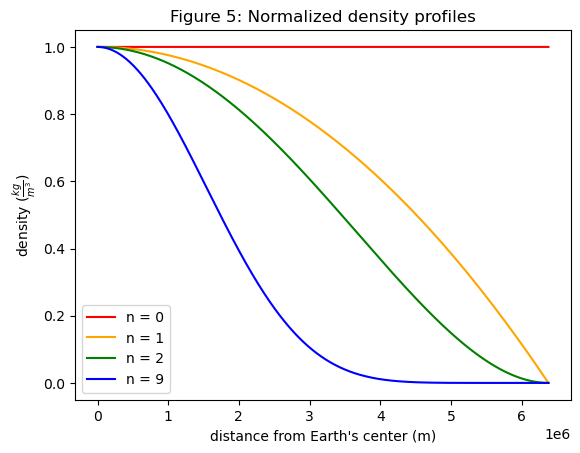

In [17]:
# Part 5.1

n = 10000
r = np.linspace(0,R_E,n)

# finding each rho(r) for n = 0,1,2,9

def rho_0(x):
    y = (1 - (x**2)/(R_E**2))**0
    return y

def rho_1(x):
    y = (1 - (x**2)/(R_E**2))**1
    return y

def rho_2(x):
    y = (1 - (x**2)/(R_E**2))**2
    return y

def rho_9(x):
    y = (1 - (x**2)/(R_E**2))**9
    return y

y0 = rho_0(r)
y1 = rho_1(r)
y2 = rho_2(r)
y9 = rho_9(r)

# graphing rho(r) as a function of r

fig7, ax7 = plt.subplots(1,1)
ax7.plot(r, y0, color = 'red', label = "n = 0")
ax7.plot(r, y1, color = 'orange', label = "n = 1")
ax7.plot(r, y2, color = 'green', label = "n = 2")
ax7.plot(r, y9, color = 'blue', label = "n = 9")
ax7.set_xlabel("distance from Earth's center (m)")
ax7.set_ylabel(r"density ($\frac{kg}{m^3}$)")
ax7.set_title("Figure 5: Normalized density profiles")
ax7.legend()
fig7.savefig("Figure5.png")

In [18]:
# Part 5.2

M_E = 5.972e24 # kg

def p0(x, n): # function that gets rho(n)
    y = ((4*np.pi) * (1 - (x**2)/(R_E**2))**n * (x**2))
    return y

def get_mass(x, n, pn): # function that gets the Mass
    m = 4*np.pi * pn * (1 - (x**2)/(R_E**2))**n * (x**2)
    return m 


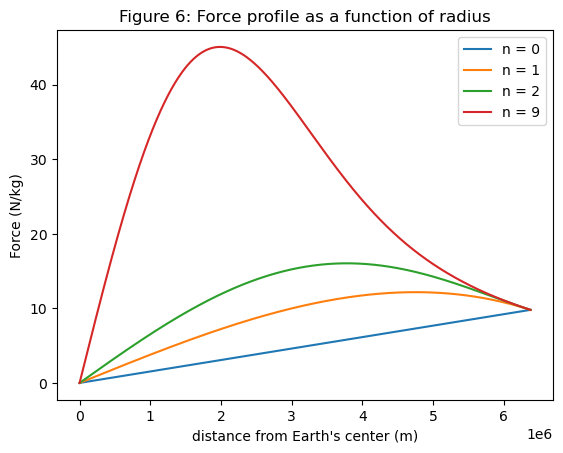

In [19]:
steps = 10000
r_eval = np.linspace(0.001, R_E, steps) # m
m = 1 # kg

def F_grav(r, n): # function that gets the force due to gravity (assuming 1 kg mass)
    sol, err = quad(p0, 0, R_E, args = (n,))
    p = M_E/sol
    M_in, err2 = quad(get_mass, 0, r, args = (n, p))
    g = G*M_in/(r**2)
    return g

# find force profiles and plot 

grav_0 = np.zeros(steps)
grav_1 = np.zeros(steps)
grav_2 = np.zeros(steps)
grav_9 = np.zeros(steps)

for i in range(steps):
    a = F_grav(r_eval[i], 0)*m
    grav_0[i] += a

for i in range(steps):
    a = F_grav(r_eval[i], 1)*m
    grav_1[i] += a

for i in range(steps):
    a = F_grav(r_eval[i], 2)*m
    grav_2[i] += a

for i in range(steps):
    a = F_grav(r_eval[i], 9)*m
    grav_9[i] += a


fig8, ax8 = plt.subplots(1,1)
ax8.plot(r_eval, grav_0, label = "n = 0")
ax8.plot(r_eval, grav_1, label = "n = 1")
ax8.plot(r_eval, grav_2, label = "n = 2")
ax8.plot(r_eval, grav_9, label = "n = 9")
ax8.set_xlabel("distance from Earth's center (m)")
ax8.set_ylabel("Force (N/kg)")
ax8.set_title("Figure 6: Force profile as a function of radius")
ax8.legend()
fig8.savefig("Figure6.png")

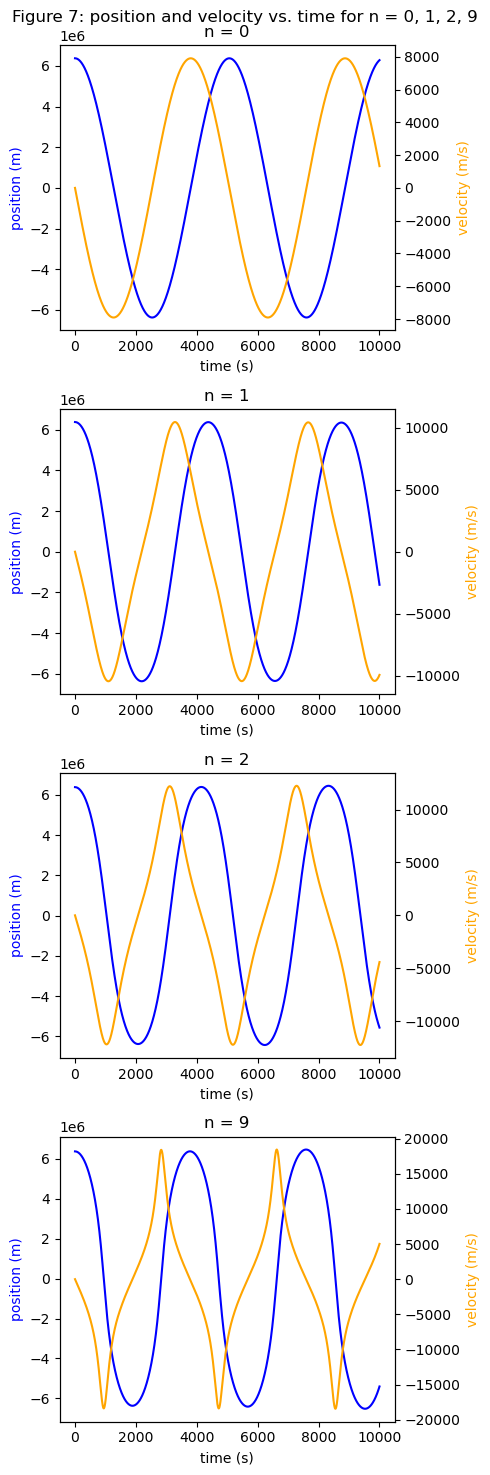

In [20]:
# 5.3: Find position and velocity as a function of time for different densities

def derivative7(t,s,n):
    y = s[0]
    v = s[1]
    r = R_E + s[0]

    dydt = v
    dvdt = -F_grav(r, n)

    return dydt, dvdt


t0, tf = 0, 10000 # s
n = 100000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

# for n = 0

soln0 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (0,))
soln1 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (1,))
soln2 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (2,))
soln9 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (9,))

t0 = soln0.t 
y0 = soln0.y[0] + R_E
v0 = soln0.y[1]

t1 = soln1.t 
y1 = soln1.y[0] + R_E
v1 = soln1.y[1]

t2 = soln2.t 
y2 = soln2.y[0] + R_E
v2 = soln2.y[1]

t9 = soln9.t 
y9 = soln9.y[0] + R_E
v9 = soln9.y[1]

fig9, ax9 = plt.subplots(4,1, figsize = (5, 15))
ax9a = ax9[0].twinx()
ax9b = ax9[1].twinx()
ax9c = ax9[2].twinx()
ax9d = ax9[3].twinx()

ax9[0].plot(t0, y0, color = "blue")
ax9a.plot(t0, v0, color = "orange")

ax9[1].plot(t1, y1, color = "blue")
ax9b.plot(t1, v1, color = "orange")

ax9[2].plot(t2, y2, color = "blue")
ax9c.plot(t2, v2, color = "orange")

ax9[3].plot(t9, y9, color = "blue")
ax9d.plot(t9, v9, color = "orange")

ax9[0].set_xlabel("time (s)")
ax9[0].set_ylabel("position (m)", color = "blue")
ax9a.set_ylabel("velocity (m/s)", color = "orange")
ax9[0].set_title("n = 0")

ax9[1].set_xlabel("time (s)")
ax9[1].set_ylabel("position (m)", color = "blue")
ax9b.set_ylabel("velocity (m/s)", color = "orange")
ax9[1].set_title("n = 1")

ax9[2].set_xlabel("time (s)")
ax9[2].set_ylabel("position (m)", color = "blue")
ax9c.set_ylabel("velocity (m/s)", color = "orange")
ax9[2].set_title("n = 2")

ax9[3].set_xlabel("time (s)")
ax9[3].set_ylabel("position (m)", color = "blue")
ax9d.set_ylabel("velocity (m/s)", color = "orange")
ax9[3].set_title("n = 9")


fig9.suptitle("Figure 7: position and velocity vs. time for n = 0, 1, 2, 9")
plt.tight_layout()

fig9.savefig("Figure7.png")

In [21]:
# 5.4: time to reach the center 

def center(t, s, n):
    return s[0] + R_E

t0, tf = 0, 10000 # s
n = 100000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

soln0 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (0,), events = center)
soln1 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (1,), events = center)
soln2 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (2,), events = center)
soln9 = solve_ivp(fun = derivative7, t_span=(t0,tf), y0 = init_cond, t_eval = t, args = (9,), events = center)

t0_center = soln0.t_events[0][0]
t1_center = soln1.t_events[0][0]
t2_center = soln2.t_events[0][0]
t9_center = soln9.t_events[0][0]

v0_center = soln0.y_events[0][0][1]
v1_center = soln1.y_events[0][0][1]
v2_center = soln2.y_events[0][0][1]
v9_center = soln9.y_events[0][0][1]

print(f"For n = 0, the mass reaches the center of the Earth at time {t0_center} seconds.")
print(f"The n = 0, the speed of the mass when it reaches the center of the Earth is {v0_center} m/s.")
print()
print(f"For n = 1, the mass reaches the center of the Earth at time {t1_center} seconds.")
print(f"The n = 1, the speed of the mass when it reaches the center of the Earth is {v1_center} m/s.")
print()
print(f"For n = 2, the mass reaches the center of the Earth at time {t2_center} seconds.")
print(f"The n = 2, the speed of the mass when it reaches the center of the Earth is {v2_center} m/s.")
print()
print(f"For n = 9, the mass reaches the center of the Earth at time {t9_center} seconds.")
print(f"The n = 9, the speed of the mass when it reaches the center of the Earth is {v9_center} m/s.")

For n = 0, the mass reaches the center of the Earth at time 1267.2282288731103 seconds.
The n = 0, the speed of the mass when it reaches the center of the Earth is -7905.676404484657 m/s.

For n = 1, the mass reaches the center of the Earth at time 1096.5094366431479 seconds.
The n = 1, the speed of the mass when it reaches the center of the Earth is -10462.057399113437 m/s.

For n = 2, the mass reaches the center of the Earth at time 1035.151983275355 seconds.
The n = 2, the speed of the mass when it reaches the center of the Earth is -12202.145443308618 m/s.

For n = 9, the mass reaches the center of the Earth at time 943.8415123901656 seconds.
The n = 9, the speed of the mass when it reaches the center of the Earth is -18393.453606815074 m/s.


### Part 6: A lunar mine shaft

In [22]:
# Part 6.1

R_m = 1.7381e6 # m
M_m = 7.35e22 # kg

g0_m = G*M_m/(R_m**2)

def moon(t,s): # derivative function to find position and velocity of mass on the moon
    y = s[0]
    v = s[1]
    r = R_m + s[0]

    dydt = v
    dvdt = -g0_m*(r/R_m)

    return dydt, dvdt

def center(t, s): # function returns zero when the mass reaches the opposite side of the Earth
    return s[0] + R_m

t0, tf = 0, 10000 # s
n = 100000
t = np.linspace(t0, tf, n)

init_cond = [0, 0]

soln = solve_ivp(fun = moon, t_span=(t0,tf), y0 = init_cond, t_eval = t, events = (center, other_side))

t_center = soln.t_events[0][0]

print(f"The mass would reach the center of the moon at {t_center} seconds.")

The mass would reach the center of the moon at 1624.9280402390161 seconds.


In [23]:
# Part 6.2

#calculate densities of Earth and Moon

density_E = M_E/((4/3)*np.pi*(R_E**3))
density_m = M_m/((4/3)*np.pi*(R_m**3))

#calculate density ratio

density_ratio = density_m/density_E

print(f"The density of the Earth is {density_E} kg/m^3.")
print(f"The density of the Moon is {density_m} kg/m^3.")
print()
print(f"The ratio of the density of the Earth to the density of the Moon is {density_ratio}.")

The density of the Earth is 5494.867409551201 kg/m^3.
The density of the Moon is 3341.7538038703183 kg/m^3.

The ratio of the density of the Earth to the density of the Moon is 0.6081591337511927.


Part 6.3: The relationship between fall time and density

If we ignore drag:

$\frac{d^2y}{dx^2} = -g_0\frac{y}{R}$

We can guess the solution:

$y(t) = Y_0cos(wt) + V_0sin(wt)$

where $w = \sqrt{\frac{g_0}{R}}$

Then we can apply the initial condition: 

$V_0 = 0$

And we know the first term must also be zero at the start, so

$y(t) = 0$ when $wt = \frac{\pi}{2}$, which implies $t = \sqrt{\frac{\pi^2R}{4g_0}}$

We can use the following formula for $g_0$:

$g_0 = \frac{GM}{R^2} = \frac{G}{R^2}\frac{4\pi \rho R^3}{3} = \frac{4G\pi \rho R}{3}$

Plugging this into the equation for t, we get the following relation between fall time to the center and density:

$t_{center} = \sqrt{\frac{3\pi}{16G\rho}}$

In [24]:
t_sol_m = np.sqrt(3*np.pi/16/G/density_m)
print(t_sol_m)

t_sol_E = np.sqrt(3*np.pi/16/G/density_E)
print(t_sol_E)

1625.1201867414668
1267.342799918946
